# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# pprint - useful for browsing api results
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [41]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
#Define the base URL for all queries to Open Weather Map
base_url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&q="

#Create a test call with the first city to examine the result layout
query = f"{base_url}{cities[0]}"
print(f"Test query: {query}")

#Call API - add api key "anonymously" to reduce the chance of accidentally printing it in diagnostic output
response = requests.get(f"{query}&appid={weather_api_key}") 
json = response.json()
pprint(json)

Test query: https://api.openweathermap.org/data/2.5/weather?units=imperial&q=rikitea
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -23.12, 'lon': -134.97},
 'dt': 1595004539,
 'id': 4030556,
 'main': {'feels_like': 73.38,
          'grnd_level': 1013,
          'humidity': 82,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 73.33,
          'temp_max': 73.33,
          'temp_min': 73.33},
 'name': 'Rikitea',
 'rain': {'1h': 0.5},
 'sys': {'country': 'PF', 'sunrise': 1595000388, 'sunset': 1595039518},
 'timezone': -32400,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 12, 'speed': 11.3}}


In [46]:
#Create empty lists to store the sets and records described in the starter output
city_sets = []
city_records = []

print("Beginning Data Retrieval")
print("------------------------------")

#Iterate through all the cities, capturing weather data downloaded
for city in cities:
    
    try:
        #Build the query by adding the current city name to the base URL
        query = f"{base_url}{city}"
        
        #Execute the query and get its JSON result
        response = requests.get(f"{query}&appid={weather_api_key}")
        json = response.json()

        #Identify the city's sequence in the results
        #(A city not found will cause a KeyError when attempting to read its name below)
        print(f"Processing Record {str(len(city_records) + 1)} of Set {str(len(city_sets) + 1)} | {json['name']}")
        city_records.append(json)
    
    #Handle KeyErrors (that happen when a city is not found)
    except KeyError:
        
        #Report that the requested city is not found
        print(f"City '{city}' not found; skipping...")

    #Pause between requests to avoid getting shut down as a spammer
    time.sleep(1) 
    
    if (len(city_records) >= 50):    
        city_sets.append(city_records)
        city_records = []
    
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")
        

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | Rikitea
Processing Record 2 of Set 1 | Barrow
Processing Record 3 of Set 1 | Chapais
Processing Record 4 of Set 1 | Castro
Processing Record 5 of Set 1 | Pevek
Processing Record 6 of Set 1 | Thohoyandou
Processing Record 7 of Set 1 | Mataura
Processing Record 8 of Set 1 | George Town
Processing Record 9 of Set 1 | Cabo San Lucas
Processing Record 10 of Set 1 | Sioux Lookout
City 'barentsburg' not found; skipping...
City 'mentok' not found; skipping...
Processing Record 11 of Set 1 | Bethel
Processing Record 12 of Set 1 | Leningradskiy
Processing Record 13 of Set 1 | Caravelas
Processing Record 14 of Set 1 | Port-Gentil
Processing Record 15 of Set 1 | Kaitangata
Processing Record 16 of Set 1 | Punta Arenas
Processing Record 17 of Set 1 | Mar del Plata
Processing Record 18 of Set 1 | Conil
Processing Record 19 of Set 1 | Saldanha
Processing Record 20 of Set 1 | Dunedin
Processing Record 21 of Set 1 | B

Processing Record 35 of Set 4 | Tilichiki
Processing Record 36 of Set 4 | Labuhan
Processing Record 37 of Set 4 | Kumul
Processing Record 38 of Set 4 | Paracuru
Processing Record 39 of Set 4 | Shelabolikha
Processing Record 40 of Set 4 | Lake Havasu City
Processing Record 41 of Set 4 | Isangel
Processing Record 42 of Set 4 | Fairbanks
City 'sataua' not found; skipping...
Processing Record 43 of Set 4 | Pervomayskiy
Processing Record 44 of Set 4 | Vágur
Processing Record 45 of Set 4 | Pio IX
Processing Record 46 of Set 4 | Palana
Processing Record 47 of Set 4 | Linden
Processing Record 48 of Set 4 | Ginir
Processing Record 49 of Set 4 | Sobrance
Processing Record 50 of Set 4 | Qaqortoq
Processing Record 1 of Set 5 | São João da Barra
Processing Record 2 of Set 5 | Ribeira Grande
Processing Record 3 of Set 5 | Pisco
Processing Record 4 of Set 5 | Bilma
Processing Record 5 of Set 5 | Huimanguillo
Processing Record 6 of Set 5 | Disna
Processing Record 7 of Set 5 | Aksu
City 'nizhneyansk' n

Processing Record 20 of Set 8 | Yulara
Processing Record 21 of Set 8 | Kralendijk
City 'sentyabrskiy' not found; skipping...
Processing Record 22 of Set 8 | Bawku
Processing Record 23 of Set 8 | Māngrol
Processing Record 24 of Set 8 | Henties Bay
City 'jiddah' not found; skipping...
Processing Record 25 of Set 8 | Dandong
City 'autopan' not found; skipping...
Processing Record 26 of Set 8 | Marabu
Processing Record 27 of Set 8 | Portobelo
City 'bolungarvik' not found; skipping...
Processing Record 28 of Set 8 | Ormara
City 'ambodifototra' not found; skipping...
Processing Record 29 of Set 8 | Valentín Gómez Farías
Processing Record 30 of Set 8 | Shetpe
City 'samalaeulu' not found; skipping...
Processing Record 31 of Set 8 | Razumnoye
Processing Record 32 of Set 8 | Aksay
Processing Record 33 of Set 8 | Kungurtug
Processing Record 34 of Set 8 | Iskateley
Processing Record 35 of Set 8 | Marquette
Processing Record 36 of Set 8 | Altea
Processing Record 37 of Set 8 | Zhalantun
Processing R

Processing Record 44 of Set 11 | Gorontalo
City 'marathopolis' not found; skipping...
Processing Record 45 of Set 11 | Buenavista
City 'samusu' not found; skipping...
Processing Record 46 of Set 11 | Kresttsy
Processing Record 47 of Set 11 | Agnibilékrou
Processing Record 48 of Set 11 | Hanahan
Processing Record 49 of Set 11 | Vangaindrano
Processing Record 50 of Set 11 | Amahai
Processing Record 1 of Set 12 | Petatlán
Processing Record 2 of Set 12 | Røros
Processing Record 3 of Set 12 | Jumla
Processing Record 4 of Set 12 | Zarubino
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:
#create a blank list to store the transformed weather data 
cities = []

#Iterate through the sets from above
for city_set in city_sets:
    
    #Iterate through each city record in the current set
    for record in city_set:
        
            #Create a blank dictionary to store the current record
            city = {}
            
            #Add key-values to the dictionary from the current record
            city['City'] = record['name']
            city['Lat'] = record['coord']['lat']
            city['Lng'] = record['coord']['lon']
            city['Max Temp'] = record['main']['temp_max']
            city['Humidity'] = record['main']['humidity']
            city['Cloudiness'] = record['clouds']['all']
            city['Wind Speed'] = record['wind']['speed']
            city['Country'] = record['sys']['country']
            city['Date'] = record['dt']
            
            #Add the current dictionary to the list of cities
            cities.append(city)

#Create a dataframe from the list of cities, using its keys as headers, and output to a csv file
city_data = pd.DataFrame(cities)
city_data.to_csv(output_data_file, index=False, encoding='utf-8')
city_data.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [48]:
#Load city data from CSV to avoid having to poll the API again (also to work with same set of cities)
city_data = pd.read_csv(output_data_file, encoding='utf-8')

#Display the first 5 rows of the dataframe for reference
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,73.33,82,100,11.30,PF,1595004539
1,Barrow,71.29,-156.79,33.80,86,90,14.99,US,1595004602
2,Chapais,49.78,-74.85,75.20,69,20,9.17,CA,1595004460
3,Castro,-24.79,-50.01,71.28,58,62,5.12,BR,1595004726
4,Pevek,69.70,170.31,41.29,93,80,2.04,RU,1595004727


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [49]:
#The max humidity value tells us if we have any "error" cities
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.902473,14.835600,70.256545,68.149091,49.029091,8.088891,1.595005e+09
std,34.178724,89.959146,14.944893,21.211133,36.820332,5.348835,2.095738e+02
min,-54.800000,-179.170000,23.000000,9.000000,0.000000,0.580000,1.595004e+09
25%,-8.990000,-62.770000,59.000000,55.000000,12.250000,4.297500,1.595005e+09
50%,25.405000,20.055000,72.450000,72.000000,47.500000,6.930000,1.595005e+09
75%,49.775000,96.900000,81.000000,85.000000,86.750000,11.382500,1.595005e+09
max,78.220000,178.420000,113.830000,100.000000,100.000000,34.180000,1.595005e+09


In [50]:
#  Get the indices of cities that have humidity over 100%.
err_index = city_data.loc[city_data['Humidity'] > 100].index
err_index

Int64Index([], dtype='int64')

In [51]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(err_index, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,73.33,82,100,11.30,PF,1595004539
1,Barrow,71.29,-156.79,33.80,86,90,14.99,US,1595004602
2,Chapais,49.78,-74.85,75.20,69,20,9.17,CA,1595004460
3,Castro,-24.79,-50.01,71.28,58,62,5.12,BR,1595004726
4,Pevek,69.70,170.31,41.29,93,80,2.04,RU,1595004727


In [52]:
# Extract relevant fields from the data frame

# Clean up the format of the date column to make its values more readable
clean_city_data["Date"] = pd.to_datetime(clean_city_data["Date"], unit='s').dt.strftime('%m/%d/%y')

# Export the City_Data into a csv
clean_city_data.to_csv("output_data/city_data_clean.csv", index=False, encoding='utf-8')

In [53]:
# This is done to work with the same data set if the kernel has to be shut down while work is in progress
clean_city_data = pd.read_csv("output_data/city_data_clean.csv", encoding='utf-8')
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,73.33,82,100,11.30,PF,07/17/20
1,Barrow,71.29,-156.79,33.80,86,90,14.99,US,07/17/20
2,Chapais,49.78,-74.85,75.20,69,20,9.17,CA,07/17/20
3,Castro,-24.79,-50.01,71.28,58,62,5.12,BR,07/17/20
4,Pevek,69.70,170.31,41.29,93,80,2.04,RU,07/17/20


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

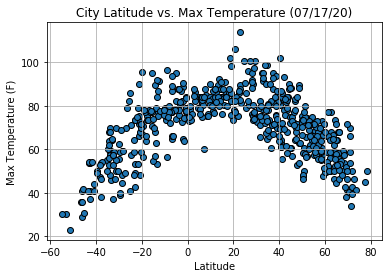

In [54]:
# Create a variable for the polling date (this will be reused in various plot titles)
# (Assumes all data was polled on the same date)
poll_date = clean_city_data['Date'].array[0]

# Scatter plot latitude vs maximum temperature
x_axis = clean_city_data['Lat']
y_axis = clean_city_data['Max Temp']
plt.scatter(x_axis, y_axis, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({poll_date})')
plt.grid(b=True, which='major', axis='both')
plt.savefig('output_data/lat-v-temp.png')
plt.show()

# This coded analyzes city latitude vs its temperature. There seems to be a pretty strong correlation,
# with the warmest temperatures near the equator (0) and coldest temperatures near the poles (+/-90). Further,
# seasonality of temperate zones (+/-20 to +/-40) is reflected with warmer temperatures in the northern
# latitudes than in the southern ones, where it is winter in July.

## Latitude vs. Humidity Plot

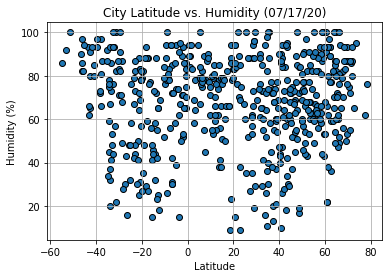

In [55]:
# Scatter plot latitude vs humidity
x_axis = clean_city_data['Lat']
y_axis = clean_city_data['Humidity']
plt.scatter(x_axis, y_axis, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({poll_date})')
plt.grid(b=True, which='major', axis='both')
plt.savefig('output_data/lat-v-humidity.png')
plt.show()

#This plot analyzes humidity at cities of varying latitudes. There does not seem to be any kind
#of relationship between the 2, as there is no pattern to the chart.

## Latitude vs. Cloudiness Plot

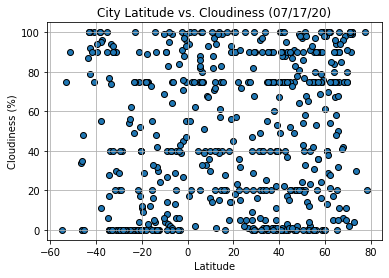

In [56]:
# Scatter plot latitude vs cloudiness
x_axis = clean_city_data['Lat']
y_axis = clean_city_data['Cloudiness']
plt.scatter(x_axis, y_axis, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({poll_date})')
plt.grid(b=True, which='major', axis='both')
plt.savefig('output_data/lat-v-cloudiness.png')
plt.show()

#This plot shows the cloudiness for cities at varying latitudes. Again, there seems to be very little
#if any correlation between a city's latitude and its cloudiness.

## Latitude vs. Wind Speed Plot

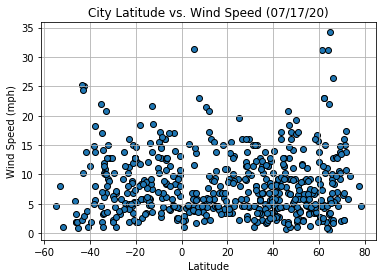

In [57]:
# Scatter plot latitude vs cloudiness
x_axis = clean_city_data['Lat']
y_axis = clean_city_data['Wind Speed']
plt.scatter(x_axis, y_axis, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({poll_date})')
plt.grid(b=True, which='major', axis='both')
plt.savefig('output_data/lat-v-windspeed.png')
plt.show()

#This plot shows the wind speed for cities at varying latitudes. There seems to be a consistent 0-15 mph wind
#in most cities, while a few at varying latitudes have higher speeds, possibly due to storms, etc.

## Linear Regression

In [64]:
# OPTIONAL: Create a function to create Linear Regression plots
def mylinregress(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    
    return regress_values, line_eq, rvalue

In [65]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = clean_city_data[clean_city_data["Lat"] >= 0]
southern_df = clean_city_data[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49526634298386685


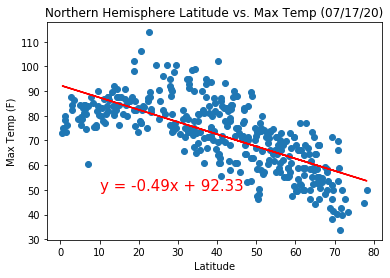

In [72]:
#Define x and y axes
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']

#Define liner regression from above custom function
(regress_values, line_eq, rvalue) = mylinregress(x_values, y_values)

#Plot the results
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f'Northern Hemisphere Latitude vs. Max Temp ({poll_date})')
plt.savefig("output_data/nh-lat-v-temp.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6182550980661188


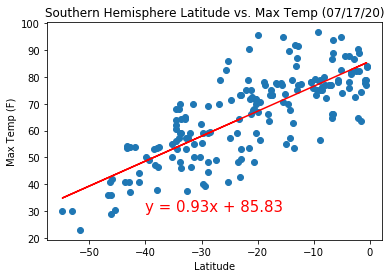

In [73]:
#Define x and y axes
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']

#Define liner regression from above custom function
(regress_values, line_eq, rvalue) = mylinregress(x_values, y_values)

#Plot the results
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f'Southern Hemisphere Latitude vs. Max Temp ({poll_date})')
plt.savefig("output_data/sh-lat-v-temp.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

#In both hemispheres, we see a strong correlation between a city's latitude and max temp, both by the
#concentration of dots and the r-squared value. This is to be expected,
#as latitudes closer to the equator (0) are generally warmer than latitudes near the poles (+/-90)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0005912626847354253


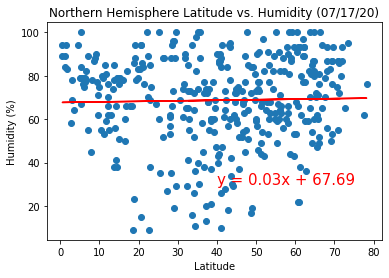

In [78]:
#Define x and y axes
x_values = northern_df['Lat']
y_values = northern_df['Humidity']

#Define liner regression from above custom function
(regress_values, line_eq, rvalue) = mylinregress(x_values, y_values)

#Plot the results
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere Latitude vs. Humidity ({poll_date})')
plt.savefig("output_data/nh-lat-v-humidity.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0271139698687876


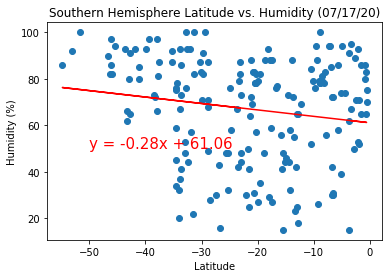

In [80]:
#Define x and y axes
x_values = southern_df['Lat']
y_values = southern_df['Humidity']

#Define liner regression from above custom function
(regress_values, line_eq, rvalue) = mylinregress(x_values, y_values)

#Plot the results
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere Latitude vs. Humidity ({poll_date})')
plt.savefig("output_data/sh-lat-v-humidity.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

#In the northern hemisphere we see a higher humidity across all latitudes, while the southern hemisphere
#is much more varied. This is reflected both in the concentration of the dots as well as r-squared. This also
#suggest that higher temperatures, from northern hemisphere summer, also cause higher humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0020218111103879562


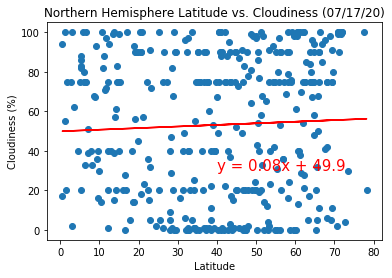

In [81]:
#Define x and y axes
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']

#Define liner regression from above custom function
(regress_values, line_eq, rvalue) = mylinregress(x_values, y_values)

#Plot the results
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere Latitude vs. Cloudiness ({poll_date})')
plt.savefig("output_data/nh-lat-v-cloudiness.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.001416251280245259


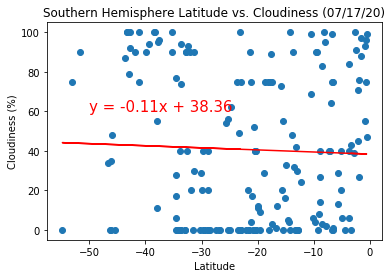

In [83]:
#Define x and y axes
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']

#Define liner regression from above custom function
(regress_values, line_eq, rvalue) = mylinregress(x_values, y_values)

#Plot the results
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere Latitude vs. Cloudiness ({poll_date})')
plt.savefig("output_data/sh-lat-v-cloudiness.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

#These plots analyzes cloudiness of cities at varying latitudes. While the overall correlation between
#cloudiness and latitude is almost non-existent, we do see a very slightly higher correlation in the 
#northern hemisphere, suggesting that its higher temps (summertime) may actually help burn up clouds
#a little bit more than their wintertime counterparts.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004242468254007806


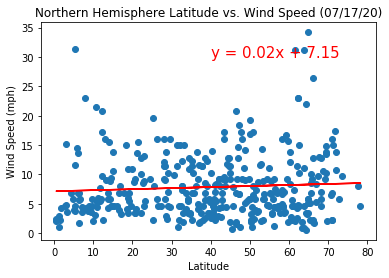

In [84]:
#Define x and y axes
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']

#Define liner regression from above custom function
(regress_values, line_eq, rvalue) = mylinregress(x_values, y_values)

#Plot the results
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere Latitude vs. Wind Speed ({poll_date})')
plt.savefig("output_data/nh-lat-v-windspeed.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0030375912881464608


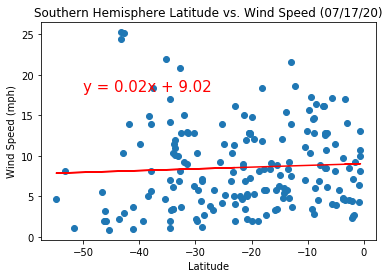

In [87]:
#Define x and y axes
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']

#Define liner regression from above custom function
(regress_values, line_eq, rvalue) = mylinregress(x_values, y_values)

#Plot the results
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,18),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere Latitude vs. Wind Speed ({poll_date})')
plt.savefig("output_data/sh-lat-v-windspeed.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

#These plots analyze wind speed of cities at varying latitudes. There appears to be a consistent, non-existent 
#relationship between the two, suggesting that neither latitude nor season have much of an impact on wind speed.

In [26]:
#Overall observations:
#.   1. There is a strong, direct correlation between both latitude and season, and temperature. 
#.      The closer to the equator, the higher its temperature. Also, the hemisphere in summer has higher temps
#.      in its temperate latitudes compared to its counterpart in winter.
#.   2. While latitude and humidity do not appear to be correlated, humidity does seem to be slightly more-
#.      consistently lower in the temperate and polar latitudes of the hemisphere in winter. This could 
#.      possibly be attributed to cooler temperates (also in the same regions) not holding water vapor as well.
#.   3. While latitude and cloudiness also do not appear to be correlated, cloudiness does seem to be slightly
#.      more-consistently lower across all latitudes of the hemisphere in summer. This could possibly be
#.      attributed to warmer temperatures (also in the same regions), and their associated greater sunshine, 
#.      better burning off clouds.
#.   4. Neither latitude nor season appears to have any notable impact on wind, as it seems to be distributed
#.      at different speeds across all latitudes of both hemispheres.
